<img src="http://escolar.itam.mx/centro_tesis/img/logo-ITAM.png" style="width:250px">
# Machine Learning

## Comparando SVM y NN
Tarea 11 : Gustavo Augusto Mondragón Sánchez : 136894

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

#### Datos:

In [2]:
#Datos:
npuntos = 100
centros = np.array([[0,0],[5,5],[10,10]])
var = np.array([1,1,1])
n = centros.shape[0]
X = np.zeros((n,npuntos,2))
Y = np.zeros((n,npuntos,1))
for i in range(0, n):
    X[i] = np.random.normal(centros[i,0], var[i], [npuntos,2])
    Y[i] = 1.0*np.array((X[i,:,0]-centros[i,0])**2 + (X[i,:,1]-centros[i,1])**2 < var[i]**2).reshape(npuntos,1)
    
xaux = X.reshape(n*npuntos,2)
yaux = Y.reshape(n*npuntos,1)

#### KNN

In [3]:
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(xaux,yaux.ravel()) 
y_predKNN = neigh.predict(xaux)
accKNN = accuracy_score(yaux, y_predKNN)
print("Accuracy:",accKNN)

Accuracy: 0.963333333333


#### Neural Net

In [4]:
clf = MLPClassifier(solver='lbfgs', alpha=1e-5, random_state=1)
clf.fit(xaux,yaux.ravel())
y_predNN = clf.predict(xaux)
accNN = accuracy_score(yaux, y_predNN)
print("Accuracy:",accNN)

Accuracy: 0.816666666667


#### SVM

In [5]:
clfS = SVC(C=1.0, kernel="rbf")
clfS.fit(xaux,yaux.ravel())
y_predS = clfS.predict(xaux)
accSVM = accuracy_score(yaux, y_predS)
print("Accuracy:",accSVM)

Accuracy: 0.973333333333


#### Comparativo:

Green=Correct, Red=Incorrect


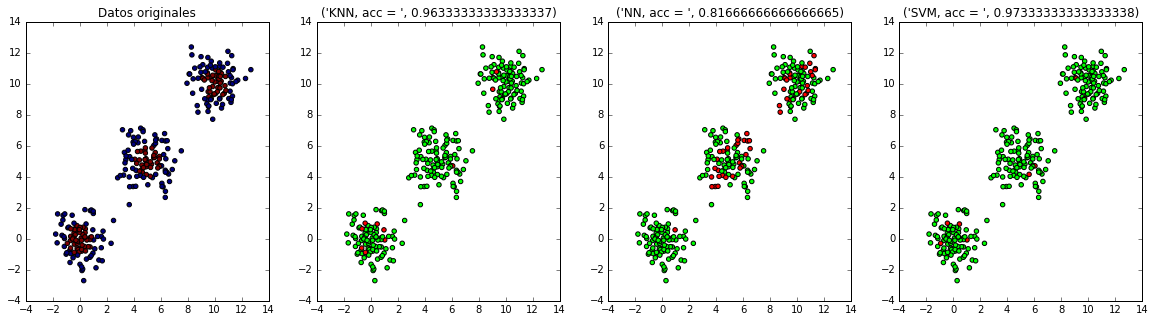

In [8]:
def getClasses(y,yp,n):
    res = np.zeros((n,3))
    for i in range(0,n):
        res[i] = [0, 255, 0] if (y[i]==yp[i]) else [255, 0, 0]
    return res
    
plt.figure(figsize=(20,5))

plt.subplot(1,4,1)
cad = "Datos originales"
plt.title(cad)
YW = yaux
plt.scatter(xaux[:,0],xaux[:,1],c=YW)

plt.subplot(1,4,2)
cad = "KNN, acc = ",accKNN
plt.title(cad)
YW = getClasses(yaux,y_predKNN,3*npuntos)
plt.scatter(xaux[:,0],xaux[:,1],c=YW/255.0)

plt.subplot(1,4,3)
cad = "NN, acc = ",accNN
plt.title(cad)
YW = getClasses(yaux,y_predNN,3*npuntos)
plt.scatter(xaux[:,0],xaux[:,1],c=YW/255.0)

plt.subplot(1,4,4)
cad = "SVM, acc = ",accSVM
plt.title(cad)
YW = getClasses(yaux,y_predS,3*npuntos)
plt.scatter(xaux[:,0],xaux[:,1],c=YW/255.0)
    
print("Green=Correct, Red=Incorrect")
plt.show()